In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date

In [35]:
# Most Interesting Strike 3d plot
# shows which strike o_traders are most interested per given ticker & expiration date. 
# %matplotlib qt

# expirations = np.arange(1,3) # 2
expirations = np.array([1]) # only Jan 15
# days = np.arange(1,6) # days observed
days = np.array([1,2])
# curr_price = 50
# consensus = np.array([50, 55, 60, 60, 60]) # general price forecast for next 5 periods
contracts = np.array(['PLTR210115C00003000', 'PLTR210115C00004000',
       'PLTR210115C00005000', 'PLTR210115C00006000',
       'PLTR210115C00007000', 'PLTR210115C00008000',
       'PLTR210115C00009000', 'PLTR210115C00010000',
       'PLTR210115C00011000', 'PLTR210115C00012000',
       'PLTR210115C00013000', 'PLTR210115C00014000',
       'PLTR210115C00015000', 'PLTR210115C00016000',
       'PLTR210115C00017000', 'PLTR210115C00018000',
       'PLTR210115C00019000', 'PLTR210115C00019500',
       'PLTR210115C00020000', 'PLTR210115C00020500',
       'PLTR210115C00021000', 'PLTR210115C00021500',
       'PLTR210115C00022000', 'PLTR210115C00022500',
       'PLTR210115C00023000', 'PLTR210115C00023500',
       'PLTR210115C00024000', 'PLTR210115C00024500',
       'PLTR210115C00025000', 'PLTR210115C00025500',
       'PLTR210115C00026000', 'PLTR210115C00026500',
       'PLTR210115C00027000', 'PLTR210115C00027500',
       'PLTR210115C00028000', 'PLTR210115C00028500',
       'PLTR210115C00029000', 'PLTR210115C00029500',
       'PLTR210115C00030000', 'PLTR210115C00030500',
       'PLTR210115C00031000', 'PLTR210115C00031500',
       'PLTR210115C00032000', 'PLTR210115C00033000',
       'PLTR210115C00034000', 'PLTR210115C00035000',
       'PLTR210115C00036000', 'PLTR210115C00037000',
       'PLTR210115C00038000', 'PLTR210115C00039000',
       'PLTR210115C00040000', 'PLTR210115C00041000',
       'PLTR210115C00042000', 'PLTR210115C00043000',
       'PLTR210115C00044000', 'PLTR210115C00045000',
       'PLTR210115C00046000', 'PLTR210115C00047000',
       'PLTR210115C00048000', 'PLTR210115C00049000',
       'PLTR210115C00050000'])
strikes = np.array([ 3. ,  4. ,  5. ,  6. ,  7. ,  8. ,  9. , 10. , 11. , 12. , 13. ,
       14. , 15. , 16. , 17. , 18. , 19. , 19.5, 20. , 20.5, 21. , 21.5,
       22. , 22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. ,
       27.5, 28. , 28.5, 29. , 29.5, 30. , 30.5, 31. , 31.5, 32. , 33. ,
       34. , 35. , 36. , 37. , 38. , 39. , 40. , 41. , 42. , 43. , 44. ,
       45. , 46. , 47. , 48. , 49. , 50. ]) # 61 available strikes


# MIS? 30! current price = 25.20
mis = strikes[op_ints[1] == np.max(op_ints[1])]
# mis

max_op_ints = np.array([x.max() for x in op_ints])
# max_op_ints
# mis_strikes = strikes[max_opints]
# find index of each max_op_int
def max_val_id(arr):
    return np.where(arr == np.max(arr))[0][0]

max_op_ints_idx = [max_val_id(arr) for arr in op_ints]
max_op_ints_idx
# and match it to strike
mis_strikes = strikes[max_op_ints_idx]
mis_strikes

array([31., 30., 29.])

In [72]:
# strikes are the only INDEPENDENT variable which we ultimately are interested in. 
# we expect arr = [(exp1, day1, strike),(exp1, day2, strike),] in which we iterate DAYs first (like for this exp day we have 5 days of observations)
# re-arrange arr so that [(exp1, day1, strike), (exp2, day1, strike), (exp1, day2, strike), (exp2, day2, strike)]

# one week of observations for next 6 months
mis_strikes = np.array([
    [20, 22, 24, 25, 30, 30], # rows = days, cols = exps, val = mis_strikes
    [20, 25, 26, 27, 31, 32],
    [25, 27, 28, 26, 31, 35],
    [30, 35, 35, 36, 31, 37],
    [30, 35, 35, 36, 31, 38]
])
    

df3d = pd.DataFrame(mis_strikes, 
                    columns=[1, 2, 3, 4, 5, 6]
#                     columns=['a', 'b', 'c', 'd', 'e', 'f']
                   )
df3d

,1,2,3,4,5,6
0,20,22,24,25,30,30
1,20,25,26,27,31,32
2,25,27,28,26,31,35
3,30,35,35,36,31,37
4,30,35,35,36,31,38


In [69]:
def prepare_xyz(df):
    arr = []

    for day in df.index:
        for exp in df.columns:
            bar = [exp, day, df.loc[day, exp]]
            arr.append(bar)
    #         print(bar)
    x = [] 
    y = [] 
    z = []

    for bar in arr:
        exp, day, strike = bar
        x.append(exp)
        y.append(day)
        z.append(strike)
        
    return x, y, z



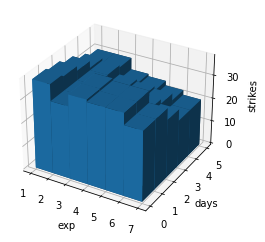

In [73]:
def my_bar3d_plotter(ax, x, y, z, width=1, depth=1, labels=['x', 'y', 'z']):
    bottom = np.zeros_like(z)
    hight = z
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_zlabel(labels[2])
    out = ax.bar3d(x, y, bottom, width, depth, hight)
    return out



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x, y, z = prepare_xyz(df3d)
    
my_bar3d_plotter(ax, x, y, np.flip(z), labels=['exp', 'days', 'strikes'])

In [45]:
# parse contractSymbol date
def parse_contractSymbol(cs, rdate=False, asdict=False):
    #     cs = 'PLTR210108C00025000'
    ticker = cs [:-15]
    year = cs[-15:-13]
    month = cs[-13:-11]
    day = cs[-11:-9]
    instr_type = cs[-9]
    strike = float(cs[-8:])/1000
    
    if rdate == True:
        return date(2000+int(year), int(month), int(day))
    
    if asdict == True:
        return {
            'ticker': ticker,
            'year': year,
            'month': month,
            'day': day,
            'instr_type': instr_type,
            'strike': strike,
        }
    return (ticker, year, month, day, instr_type, strike)

# parse_contractSymbol('PLTR210108C00025000') # ('PLTR', '21', '01', '08', 'C', 25.0)
# parse_contractSymbol('PLTR210108C00025000', rdate=True) # 

# pick one the most interesting contract symbol
def max_interest_by(df, col='openInterest'):
    return df.loc[df.sort_values(by=[col], ascending=False)[col].idxmax()] # Series


# ('2021-01-15', 30.0, 80195)

In [16]:
# produce one bar from an option chain by col
# I will loop over all_calls with this, 
def add_one_mis_bar_to_x_axis(o_chain, exp='a', misdf=pd.DataFrame([]),  col='openInterest'):
    # MIS DataFrame is 
    # rows == days of observations
    # cols = expirations
    # values = MIS
    # mis == most interesting strike by openInterest
    _misdf = misdf.copy() # !!!!
    mis = max_interest_by(o_chain, col=col)
    exp, strike = parse_contractSymbol(mis['contractSymbol'], rdate=True), mis['strike']
    # print(exp, strike)
    _misdf[exp] = [strike]
    return _misdf

,2021-01-15,2021-01-22
0,30.0,NaN
1,NaN,30.0


In [3]:
# start again - I have a full option chain, taken on day 1, lets 3d plot it
calls = pd.read_csv('./csv/pltr/calls.csv', index_col=0)
calls1 = pd.read_csv('./csv/pltr/calls1.csv', index_col=0)
print(calls.shape)
print(calls1.shape)

(436, 20)
(387, 20)


In [5]:
def add_z_score(df, column='openInterest'):
    """
    Calculates z-score based on values of the given column. 
    Appends a column with stored results.
    """
    new_df = df.copy()
    new_df[column+'Z'] = (df[column] - df[column].mean())/df[column].std()
    return new_df


def filter_by_z_score(df, column='openInterest', mean=True, let=.5):
    """
    Filters df by it's z-score. 
    mean - if True, takes all values higher than mean z-score
    let - larger or equal than value
    """
    if mean:
        return df.loc[df[column+'Z'] > df[column+'Z'].describe()['mean']]
    
    return df.loc[df[column+'Z'] >= let]


def datetime_valid(dt_str):
    try:
        datetime.fromisoformat(dt_str)
    except:
        return False
    return True

def filter_by_date(df, date, column='exp'):
    """
    Second argument must be a datetime.date object
    """
    #     if not datetime_valid(str(date)):
    #         raise Exception(f"Second positional argument must be valid iso format date - yyyy-mm-dd. Received {date}")
    #     if type(date) is not 'datetime.date':
    #         raise Exception(f"Second positional argument must be datetime.date object. Received {type(date)}")
    return df[df[column] == date]

    
# filter_by_date(calls, exps[4])

# filter_by_z_score(add_z_score(filter_by_date(calls, exps[0]), column='volume'), column='volume')

In [51]:
def interesting_options(op_chain, column='openInterest', filter_by_expiration=True, z_score_mean=True, z_score_let=False):
    """
    Takes a full option chain and filters based on z-score. 
    """
    
    df = op_chain.copy()
    
    # add expiration column
    df['exp'] = df['contractSymbol'].apply(lambda cs: parse_contractSymbol(cs, rdate=True))

    # get unique expirations
    exps = df['exp'].unique() # (13,)
    
    # add stike column
    df['strike'] = df['contractSymbol'].apply(lambda cs: parse_contractSymbol(cs, asdict=True)['strike'])
    
    # set convinient dates and strikes for plot
#     df['date_strike'] = df['exp'].apply(lambda d: d.strftime('20%y-%m-%d'))

    def make_date_strike(cs):
        (ticker, year, month, day, instr_type, strike) = parse_contractSymbol(cs)
        return f"20{year}-{month}-{day} {strike}"
    
    df['date_strike'] = df['contractSymbol'].apply(lambda d: make_date_strike(d))
    
    new_df = pd.DataFrame([], columns=df.columns)
    
    for exp in exps:
        by_date = filter_by_date(df, exp)
        with_z = add_z_score(by_date, column=column)
        filtered_by_z = filter_by_z_score(with_z, 
                                          column=column, 
                                          mean=z_score_mean, 
                                          let=z_score_let)
        new_df = pd.concat([new_df, filtered_by_z], axis=0, ignore_index=True)
        
    return new_df
    
    
# pd.concat([new_df, jan_15, jan_22], axis=0, ignore_index=True)
# calls.shape # (436, 21)
# interesting_options(calls).shape # (103, 22)

In [81]:
calls = pd.read_csv('./csv/pltr/calls.csv', index_col=0)
opin_calls = interesting_options(calls)
# print(calls.shape) # (436, 20)
# print(opin_calls.shape) # (103, 23)

calls1 = pd.read_csv('./csv/pltr/calls1.csv', index_col=0)
opin_calls1 = interesting_options(calls1)
# print(calls1.shape) # (387, 20)
# print(opin_calls1.shape) # (108, 23)
opin_calls.head()
# opin_calls1.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,...,currency,undPriceAsk,undPriceBid,undPriceMid,undPriceLondonTime,undPriceTimestamp,mtime,exp,date_strike,openInterestZ
0,PLTR210115C00020000,2021-01-14 20:50:59,20.0,4.93,0.0,0.0,0.0,0.0,549.0,5142,...,USD,26.31,26.25,26.28,2021-01-15 11:51:03.797267,1.610711e+09,1.610712e+09,2021-01-15,2021-01-15 20.0,0.205940
1,PLTR210115C00023000,2021-01-14 20:58:42,23.0,1.85,0.0,0.0,0.0,0.0,524.0,9479,...,USD,26.31,26.25,26.28,2021-01-15 11:51:03.797267,1.610711e+09,1.610712e+09,2021-01-15,2021-01-15 23.0,0.633936
2,PLTR210115C00024000,2021-01-14 20:59:24,24.0,1.00,0.0,0.0,0.0,0.0,2550.0,6074,...,USD,26.31,26.25,26.28,2021-01-15 11:51:03.797267,1.610711e+09,1.610712e+09,2021-01-15,2021-01-15 24.0,0.297915
3,PLTR210115C00025500,2021-01-14 20:59:18,25.5,0.23,0.0,0.0,0.0,0.0,8200.0,6243,...,USD,26.31,26.25,26.28,2021-01-15 11:51:03.797267,1.610711e+09,1.610712e+09,2021-01-15,2021-01-15 25.5,0.314592
4,PLTR210115C00026500,2021-01-14 20:58:28,26.5,0.10,0.0,0.0,0.0,0.0,6746.0,9157,...,USD,26.31,26.25,26.28,2021-01-15 11:51:03.797267,1.610711e+09,1.610712e+09,2021-01-15,2021-01-15 26.5,0.602160


In [49]:
print(type(opin_calls['exp'][0])) # <class 'datetime.date'>
print(type(opin_calls['date_strike'][0])) # <class 'str'>

<class 'datetime.date'>
<class 'str'>


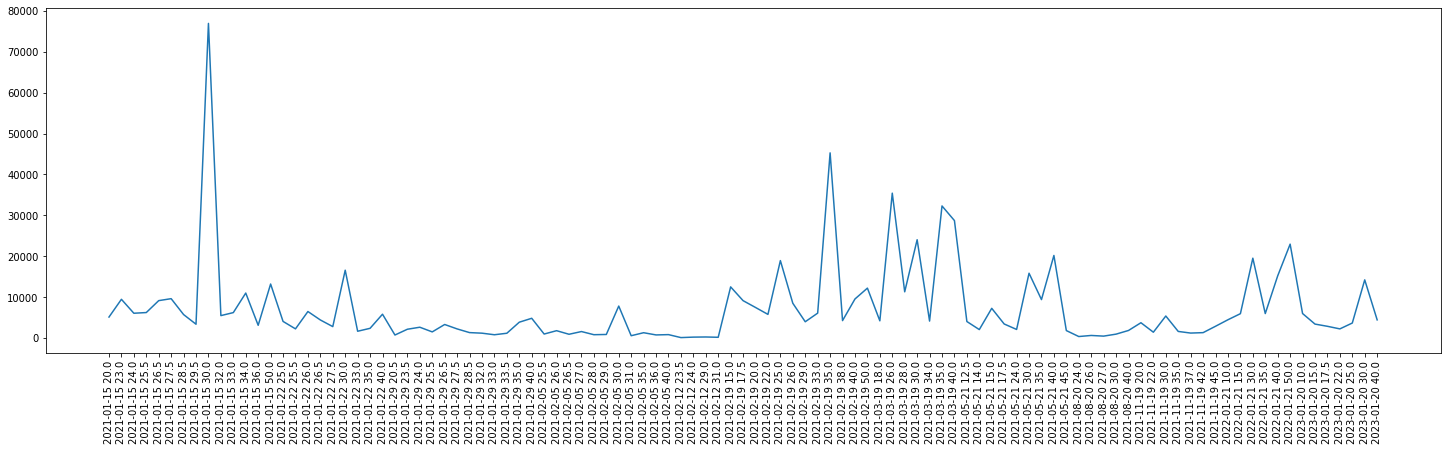

In [67]:
# plots openInterest
plt.figure(figsize=(25,10))
# fig.tight_layout()
plt.xticks(rotation=90)
# locs, labels = plt.xticks(np.arange(0, len(opin_calls['exp']),1), opin_calls['exp'])
# locs, labels = plt.xticks(np.arange(0, len(opin_calls['date_strike']),1), opin_calls['date_strike'])
plt.subplots_adjust(bottom=.4)
plt.plot(opin_calls['date_strike'], opin_calls['openInterest']) # 103


In [101]:
opin_calls.shape

(103, 23)

In [102]:
# problem if I want to plot calls and calls1 together on one graph - x lengths are diff - 108 & 103
# I need to combine columns

df = pd.DataFrame(opin_calls['openInterest'].values, index=opin_calls['date_strike'])
df1 = pd.DataFrame(opin_calls1['openInterest'].values, index=opin_calls1['date_strike'])
df.columns = ['df']
df1.columns = ['df1']
df2 = df.combine_first(df1)
# df2.to_csv('./csv/pltr/df2.csv')

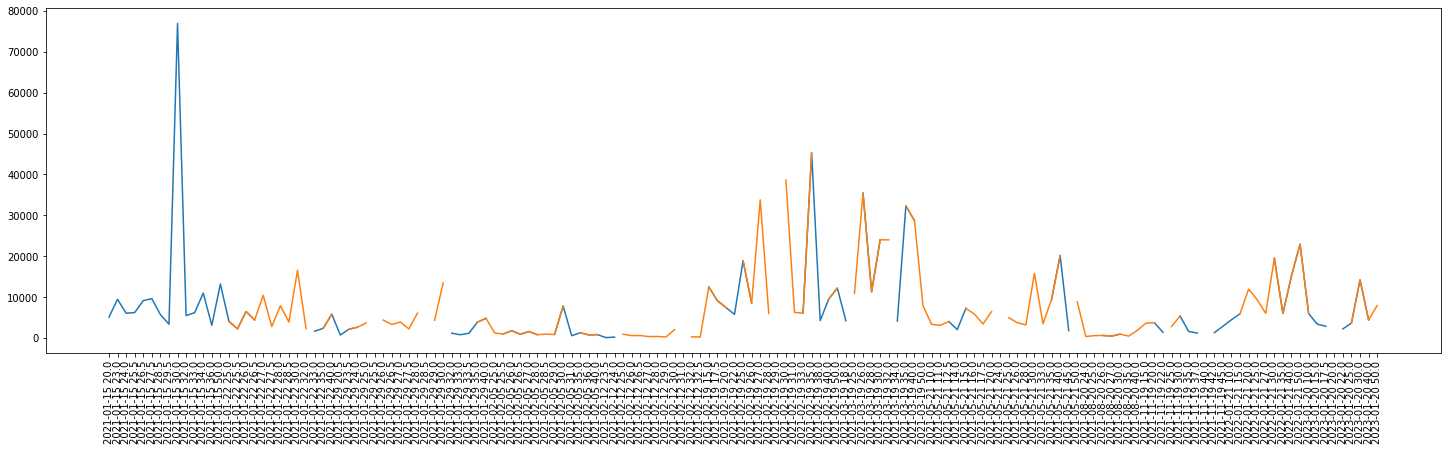

In [98]:
# plots openInterest
plt.figure(figsize=(25,10))
# fig.tight_layout()
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=.4)
plt.plot(df2['df']) # 103
plt.plot(df2['df1']) # 108

<AxesSubplot:xlabel='dates'>

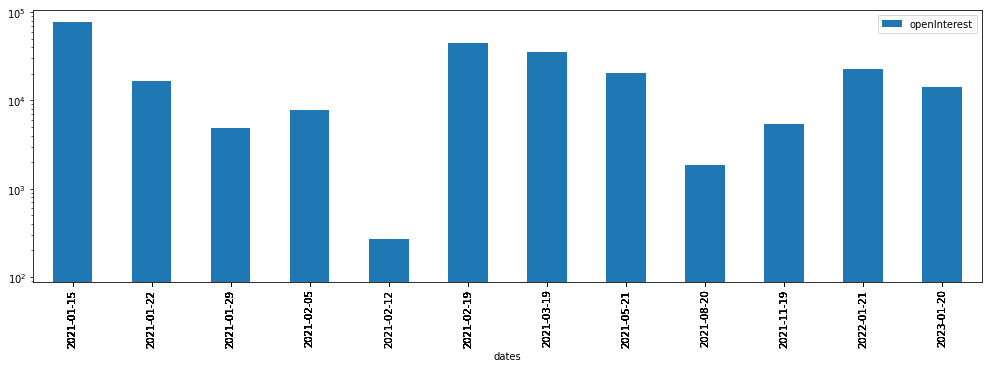

In [20]:
opin_calls.plot(y='openInterest', 
        x='dates',
        kind='bar', 
        use_index=True, 
        logy=True, 
        figsize=(17,5),
       )

In [13]:
puts = pd.read_csv('./csv/pltr/puts.csv', index_col=0)
opin_puts = interesting_options(puts)
# print(puts.shape) # (426, 20)
# print(opin_puts.shape) # (97, 23)

puts1 = pd.read_csv('./csv/pltr/puts1.csv', index_col=0)
opin_puts1 = interesting_options(puts1)
# print(puts1.shape) # (377, 20)
# print(opin_puts1.shape) # (97, 23)

opin_puts.plot(y='openInterest', 
        x='dates',
        kind='bar', 
        use_index=True, 
        logy=True, 
        figsize=(17,5),
       )

(426, 20)
(97, 23)
(377, 20)
(97, 23)


In [55]:
print(calls.shape)
print(puts.shape)

(103, 23)
(97, 23)


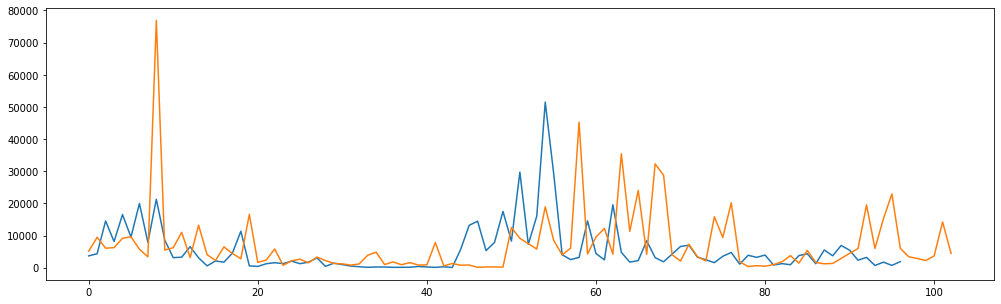

In [11]:
fig, ax = plt.subplots(figsize=(17,5))
ax.plot(puts['openInterest'])
ax.plot(calls['openInterest'])

<Figure size 1224x360 with 0 Axes>